In [1]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load MNIST Dataset
(x_train, _), (x_test, _) = mnist.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [5]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [6]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
# Add random noise
corruption_level = 0.3

In [8]:
x_train_noisy = x_train + corruption_level * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + corruption_level * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [9]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [10]:
print(x_train_noisy.shape)
print(x_test_noisy.shape)

(60000, 784)
(10000, 784)


In [11]:
# Hyper parameters
batch_size = 128
nb_epoch = 25

In [12]:
# Parameters for MNIST dataset
img_rows, img_cols = 28, 28

In [13]:
# Parameters for denoising autoencoder
nb_visible = img_rows * img_cols
nb_hidden = 32

In [14]:
# Build autoencoder model
input_img = Input(shape=(nb_visible,))
encoded = Dense(nb_hidden, activation='relu')(input_img)
decoded = Dense(nb_visible, activation='sigmoid')(encoded)

In [16]:
autoencoder = Model(inputs=input_img, outputs=decoded)

In [17]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [18]:
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 784)                 │          25,872 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Train
history=autoencoder.fit(x_train_noisy, x_train,
                epochs=nb_epoch, batch_size=batch_size, shuffle=True, verbose=1,
                validation_data=(x_test_noisy, x_test))

Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3140 - val_loss: 0.1688
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1598 - val_loss: 0.1374
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1345 - val_loss: 0.1231
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1220 - val_loss: 0.1155
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1159 - val_loss: 0.1126
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1136 - val_loss: 0.1116
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1123 - val_loss: 0.1100
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1106 - val_loss: 0.1084
Epoch 9/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1092 - val_loss: 0.1078
Epoch 10/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1084 - val_loss: 0.1075
Epoch 11/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1085 - val_loss: 0.1072
Epoch 12/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [21]:
# Evaluate
evaluation = autoencoder.evaluate(x_test_noisy, x_test, batch_size=batch_size, verbose=1)
print('\nSummary: Loss over the test dataset: %.2f' % (evaluation))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1062

Summary: Loss over the test dataset: 0.11


In [22]:
# Decode test images 
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step


In [23]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))

<Figure size 2000x400 with 0 Axes>

<Figure size 2000x400 with 0 Axes>

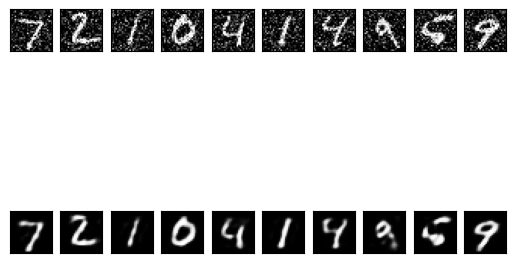

In [24]:
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

dict_keys(['loss', 'val_loss'])


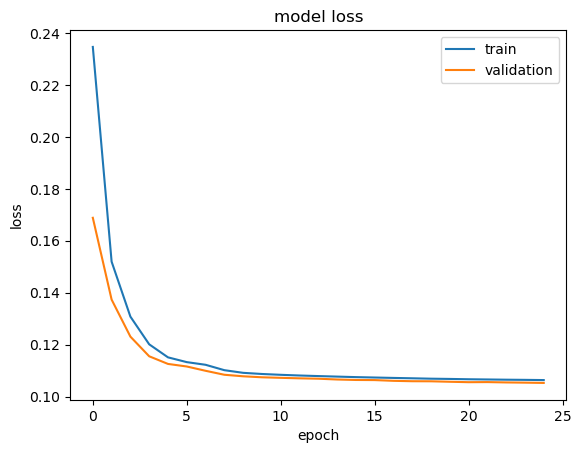

In [25]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()